# Graded Challenge 2 Phase 1
Nama: Judan Syamsul Hadad

Batch: FTDS-009

## 1. Perkenalan

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset yang digunakan pada notebook ini dapat diunduh [disini](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).

Dataset ini merupakan kumpulan beberapa parameter cuaca yang dapat digunakan untuk menentukan apakah hujan akan terjadi di esok harinya.

### 1.1. Objective
Pada notebook ini akan dilakukan regresi linier dengan tahapan berikut:
1. Exploratory Data Analysis (EDA)
2. Data preprocessing yang mencakup:
    - Cardinality
    - Splitting train set dan test set
    - Handling outliers pada train set
    - Handling missing values pada train set
    - Feature selection
    - Feature scaling dan/atau encoding
3. Model definition:
    - Logistic regression
    - Support vector classification
4. Model training
5. Model evaluation
6. Model inference

### 1.2. Problem Statement
Model mana kah yang lebih baik untuk memprediksi hujan di esok hari berdasarkan parameter cuaca hari ini di Australia?

## 2. Import Libraries

In [658]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 3. Data Loading

Definisikan random state untuk seluruh kode di notebook ini.

In [659]:
random_state = 34

Set display agar menampilkan seluruh kolom.

In [660]:
pd.set_option('display.max_columns', None)

Load dataset.

In [661]:
data = pd.read_csv('weatherAUS.csv')

Copy dataset.

In [662]:
df = data.copy()

Cek lima data teratas.

In [663]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Sudah ditemukan missing value pada lima data teratas. Cek jumlah non-missing value dan tipe data.

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Terdapat 145460 baris dan 23 kolom pada dataset.

Ubah parameter hujan pada kolom `RainTomorrow` dan `RainToday` menjadi angka 1 untuk `Yes` atau hujan dan angka 0 untuk `No` atau tidak hujan.

In [665]:
df['RainTomorrow'].replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
df['RainToday'].replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

Ubah `Date` menjadi datetime64, `RainToday` dan `RainTomorrow` menjadi float64, dan kolom lain dengan tipe data object menjadi `category`.

In [666]:
for col in df.columns:
    if col == 'Date':
        df[col] = df[col].astype('datetime64')
    elif col == 'RainToday' or col == 'RainTomorrow':
        df[col] = df[col].astype('float64')
    elif df[col].dtype == 'object':
        df[col] = df[col].astype('category')

Karena siklus hujan bersifat tahunan, maka tambahkan kolom baru berupa hari ke berapa dalam satu tahun.

In [667]:
df['Day of The Year'] = df['Date'].dt.strftime('%j').astype(int)

Cek missing value pada dataset.

In [668]:
df.isnull().sum()

Date                   0
Location               0
MinTemp             1485
MaxTemp             1261
Rainfall            3261
Evaporation        62790
Sunshine           69835
WindGustDir        10326
WindGustSpeed      10263
WindDir9am         10566
WindDir3pm          4228
WindSpeed9am        1767
WindSpeed3pm        3062
Humidity9am         2654
Humidity3pm         4507
Pressure9am        15065
Pressure3pm        15028
Cloud9am           55888
Cloud3pm           59358
Temp9am             1767
Temp3pm             3609
RainToday           3261
RainTomorrow        3267
Day of The Year        0
dtype: int64

Terdapat missing value yang tersebar di beberapa kolom.

Cek statistika deskriptif dari dataset.

In [669]:
df.describe(include='all').T.sort_index()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Cloud3pm,86102.0,NaN,NaN,NaN,NaT,NaT,4.50993,2.720357,0.0,2.0,5.0,7.0,9.0
Cloud9am,89572.0,NaN,NaN,NaN,NaT,NaT,4.447461,2.887159,0.0,1.0,5.0,7.0,9.0
Date,145460,3436,2013-11-12 00:00:00,49,2007-11-01,2017-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day of The Year,145460.0,NaN,NaN,NaN,NaT,NaT,179.337405,104.780922,1.0,88.0,176.0,270.0,366.0
Evaporation,82670.0,NaN,NaN,NaN,NaT,NaT,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Humidity3pm,140953.0,NaN,NaN,NaN,NaT,NaT,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0
Humidity9am,142806.0,NaN,NaN,NaN,NaT,NaT,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Location,145460,49,Canberra,3436,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxTemp,144199.0,NaN,NaN,NaN,NaT,NaT,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
MinTemp,143975.0,NaN,NaN,NaN,NaT,NaT,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9


Data terawal diambil pada tahun 2007 dan terakhir pada 2017. Tidak ada primary key, kolom yang memiliki unique value sejumlah baris dan berfungsi untuk identifikasi, di dataset ini.

Data kategorik pada kolom `Location` terdiri dari 49 unique value, sedangkan untuk kolom mata angin seperti `WindDir3pm` memiliki 16 unique value. Kedua tipe data kategorik ini nantinya akan disederhanakan untuk menurunkan computation cost dan mempercepat proses prediksi.

Data numerik pada kolom `Evaporation`, `Rainfall`, `WindGustSpeed`, `WindSpeed3pm` dan `WindSpeed9am` terlihat memiliki selisih yang besar sekali antara Q3 dan nilai maksimumnya. Pengecekan outlier lebih lanjut akan dilakukan pada bab Data Preprocessing.

Selanjutnya cek apakah ada duplikat berdasarkan tanggal dan lokasi.

In [670]:
df.duplicated(subset=['Date','Location']).value_counts()

False    145460
dtype: int64

Tidak ditemukan duplikat.

Deklarasikan kolom dengan data kategorik dan kolom dengan data numerik untuk digunakan untuk pengolahan pada bab-bab berikutnya.

In [671]:
#deklarasi categorical data dan numerical data
cat_cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
num_cols = df.drop(columns=cat_cols).columns.tolist()

Cek kolom data kategorik.

In [672]:
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Cek kolom data numerik.

In [673]:
num_cols

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow',
 'Day of The Year']

## 4. Exploratory Data Analysis (EDA)

Pertama-tama, cek hubungan antar variabel numerik atau kategorik yang sudah dalam bentuk numerik (seperti `RainToday` dan `RainTomorrow`) menggunakan Pearson Correlation Coefficient melalui heatmap berikut.

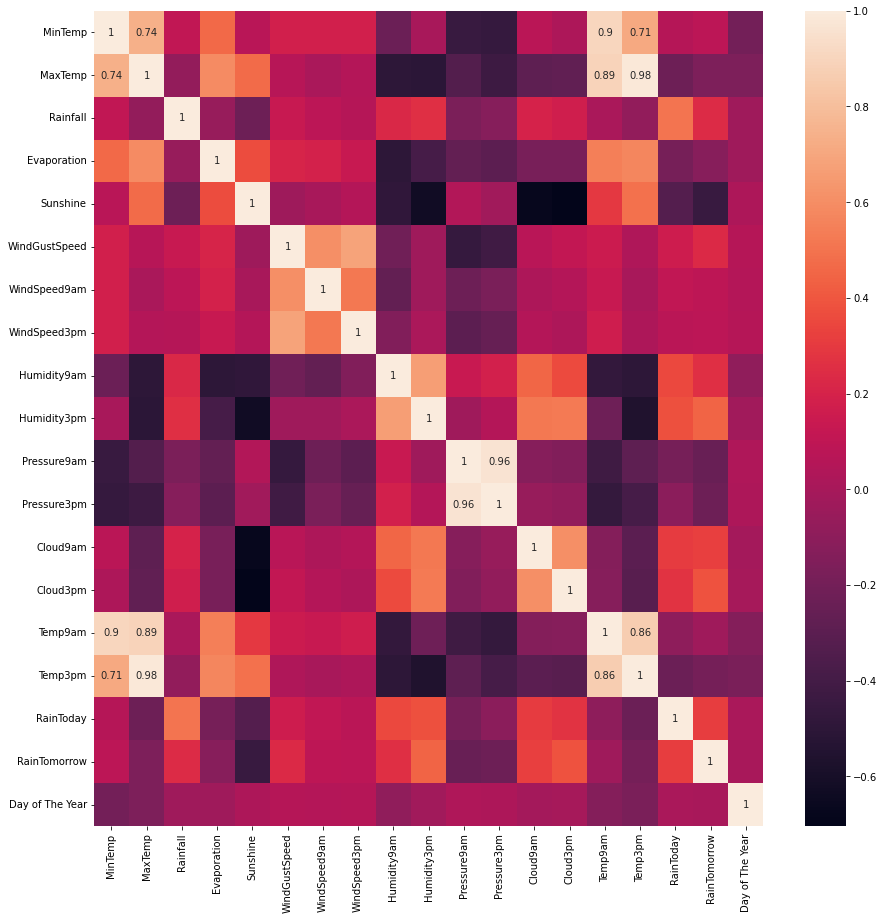

In [674]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Tidak ditemukan feature yang memiliki korelasi kuat (>0.7 atau <-0.7) terhadap `RainTomorrow` pada heatmap.

Cek perbandingan jumlah data untuk `RainTomorrow`.

Text(0.5, 1.0, 'Jumlah Data RainTomorrow')

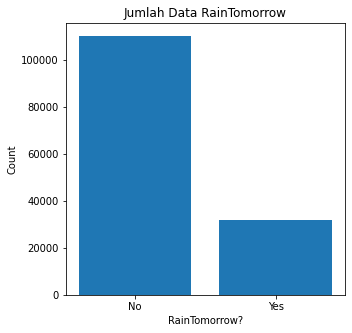

In [675]:
RainTomorrow = df['RainTomorrow'].value_counts().to_dict()

plt.figure(figsize=(5,5))
plt.bar(['No','Yes'], RainTomorrow.values())
plt.xlabel('RainTomorrow?')
plt.ylabel('Count')
plt.title('Jumlah Data RainTomorrow')

Rasio `No` terhadap `Yes` kira-kira 3 : 1. Cukup timpang. Lihat dalam pie chart.

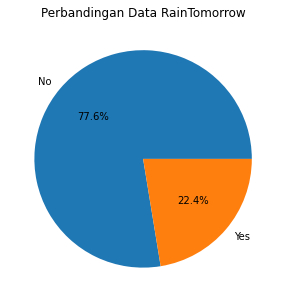

In [676]:
plt.figure(figsize=(5,5),facecolor='white')
fig = plt.pie(RainTomorrow.values(), labels=['No','Yes'], autopct='%1.1f%%')
plt.title('Perbandingan Data RainTomorrow')
plt.show()

Sekarang coba lihat sebaran `Rainfall` dari tahun ke tahun.

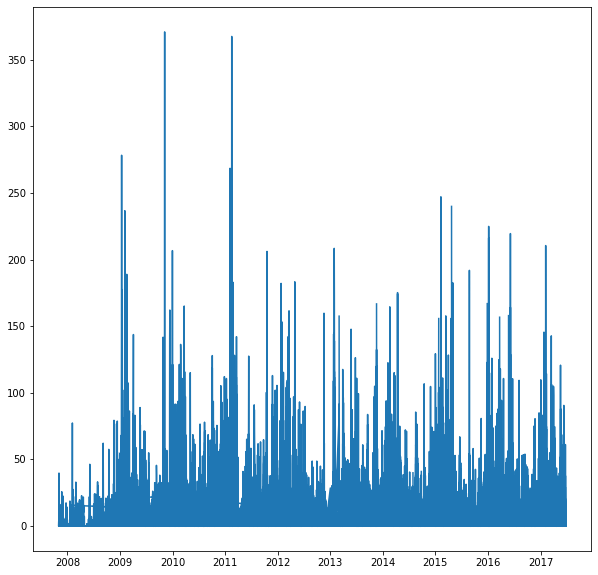

In [677]:
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['Rainfall'])

Secara visual pola Rainfall terlihat mengikuti trend yang berulang-ulang dengan catatan terjadi lonjakan yang yang cukup besar pada tahun 2009, 2010, dan 2011.

## 5. Data Preprocessing

Pada bab ini akan dilakukan pengolahan data sebelum digunakan untuk model.

### 5.1. Cardinality

Kita perlu pastikan bahwa data yang kita gunakan tidak memiliki cardinality yang tinggi.

In [678]:
df[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

Feature yang memiliki cardinality tertinggi adalah `Location` sebesar 49. Karena model ini akan digunakan untuk memprediksi hujan secara umum di Australia, maka feature ini tidak akan dipakai untuk model.

Feature lain yang memiliki cardinality cukup tinggi adalah arah angin yang terdiri dari 16 unique value. Feature ini dapat disederhanakan menjadi 8 unique value.

In [679]:
windir = {'ESE':'SE',
            'SSE':'SE',
            'SSW':'SW',
            'WSW':'SW',
            'WNW':'NW',
            'NNW':'NW',
            'NNE':'NE',
            'ENE':'NE'}
df[cat_cols].replace(windir,inplace=True)

In [680]:
df[cat_cols].nunique()

Location       49
WindGustDir     8
WindDir9am      8
WindDir3pm      8
RainToday       2
dtype: int64

Feature arah mata angin berhasil disederhanakan menjadi 8 arah mata angin.

### 5.2. Data Splitting

Tahap berikutnya adalah membagi data menjadi inference, train, dan test set.

Drop kolom yang tidak dipakai berdasarkan pembahasan pada bab sebelumnya terlebih dahulu. `Date` karena sudah diwakilkan `Day of the Year` dan `Location` karena model tidak spesifik terhadap satu daerah atau kota saja.

In [681]:
df.drop(columns='Date', inplace=True)
df.drop(columns='Location', inplace=True)
num_cols.remove('Date')
cat_cols.remove('Location')

Ambil data untuk inferensial dan hapus data tersebut dari dataset yang akan dipisahkan menjadi train dan test set.

In [682]:
#data inference
df_inf = df.dropna().sample(3, random_state=random_state)
df_tt = df.drop(index=df_inf.index)
df_inf

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day of The Year
42120,11.5,23.3,0.0,5.0,4.7,SE,37.0,W,S,11.0,30.0,74.0,60.0,1031.1,1028.8,5.0,2.0,17.6,21.9,0.0,0.0,116
13909,13.9,27.4,0.0,4.4,10.8,SW,31.0,E,SW,17.0,20.0,50.0,27.0,1017.6,1014.4,1.0,3.0,21.1,26.0,0.0,0.0,106
76533,10.8,16.5,5.8,0.6,0.2,W,54.0,NW,NW,26.0,28.0,94.0,84.0,1021.3,1019.9,8.0,8.0,13.5,15.8,1.0,1.0,182


Deklarasikan feature dan target.

In [683]:
#deklarasi train test
X = df_tt.drop(columns='RainTomorrow')
y = df_tt['RainTomorrow']

Bagi data menjadi X (feature) dan y (target) untuk masing-masing train dan test set. Sample test set yang diambil sebanyak 20% dari total data pada dataset.

In [684]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

Pastikan jumlah unique value sama antara train dan test set agar tidak ada nilai kategorik ada di kedua set.

In [685]:
X_train[cat_cols].nunique()

WindGustDir    8
WindDir9am     8
WindDir3pm     8
RainToday      2
dtype: int64

In [686]:
X_test[cat_cols].nunique()

WindGustDir    8
WindDir9am     8
WindDir3pm     8
RainToday      2
dtype: int64

Jumlah nilai kategorik sudah sama. Pisah kolom menjadi feature numerik dan katgetorik.

In [687]:
X_train_cat = X_train[cat_cols]
X_train_num = X_train.drop(columns=cat_cols)

X_test_cat = X_test[cat_cols]
X_test_num = X_test.drop(columns=cat_cols)

### 5.3. Handling Outliers

Deteksi outlier pada feature numerik. Definisikan fungsi untuk deteksi outlier terlebih dahulu.

In [688]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed extreme
def find_extreme_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 3 * IQR
    lower_boundary = Q1 - 3 * IQR
    return upper_boundary, lower_boundary

Rangkum outlier pada feature numerik.

In [689]:
#variable untuk summary
distribution = []
skewness = []
upper_limit = []
lower_limit = []
outliers_percent = []
max = []
min = []

#loop untuk summary outlier
for column in X_train_num.columns:
    col_skewness = X_train_num[column].skew()

    if (col_skewness >= -0.5) & (col_skewness <= 0.5):
        col_distribution = 'Normal'
        col_upper_limit, col_lower_limit = find_normal_boundaries(X_train_num,column)      

    else:
        col_distribution = 'Skewed'
        col_upper_limit, col_lower_limit = find_skewed_boundaries(X_train_num,column)
    
    col_max = X_train_num[column].max()
    col_min = X_train_num[column].min()
    col_outliers_percent = (len(X_train_num[X_train_num[column] > col_upper_limit]) + len(X_train_num[X_train_num[column] < col_lower_limit])) / len(X_train_num) * 100
    
    distribution.append(col_distribution)
    skewness.append(col_skewness)
    upper_limit.append(col_upper_limit)
    max.append(col_max)
    min.append(col_min)
    lower_limit.append(col_lower_limit)
    outliers_percent.append(col_outliers_percent)

#df summary
outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'upper_limit':upper_limit, 'lower_limit':lower_limit, 'max':max, 'min':min , 'outliers_percent':outliers_percent}
outliers_summary = pd.DataFrame(outliers_summary,index=X_train_num.columns)
outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
outliers_summary

,distribution_type,skewnewss,upper_limit,lower_limit,max,min,outliers_percent
Rainfall,Skewed,9.32,2.00,-1.20,371.0,0.0,17.68
WindGustSpeed,Skewed,0.87,73.50,5.50,135.0,6.0,2.14
WindSpeed3pm,Skewed,0.63,40.50,-3.50,87.0,0.0,1.71
Evaporation,Skewed,3.86,14.60,-4.60,145.0,0.0,1.38
WindSpeed9am,Skewed,0.77,37.00,-11.00,130.0,0.0,1.24
Pressure9am,Normal,-0.10,1039.00,996.31,1041.0,980.5,0.36
Humidity9am,Normal,-0.49,125.98,11.83,100.0,1.0,0.32
Pressure3pm,Normal,-0.05,1036.39,994.14,1039.6,978.2,0.30
Temp3pm,Normal,0.24,42.49,0.87,46.7,-5.1,0.28
MaxTemp,Normal,0.22,44.57,1.86,48.1,-4.1,0.23


Feature `Rainfall` memiliki outlier dengan jumlah terbanyak hingga 17.68%. Karena jumlahnya yang banyak tersebut, feature ini tidak akan di-trim maupun di-cap.

Feature lain dengan jumlah outlier di bawah 5% akan di-trim. Kelompokkan feature-featuter tersebut terlebih dahulu.

In [690]:
#grouping outliers
outliers_retain = list(outliers_summary[(outliers_summary['outliers_percent']>15)].index)
outliers_capping = list(outliers_summary[(outliers_summary['outliers_percent']>=5) & (outliers_summary['outliers_percent']<=15)].index)
outliers_trimming = list(outliers_summary[(outliers_summary['outliers_percent']<5)].index)

Cek feature yang akan di-retain.

In [691]:
#cek feature dengan outlier yang akan di-retain
outliers_summary.loc[outliers_retain]

,distribution_type,skewnewss,upper_limit,lower_limit,max,min,outliers_percent
Rainfall,Skewed,9.32,2.0,-1.2,371.0,0.0,17.68


Feature ini terdistribusi secara skewed yang cukup parah. Lihat grafik distribusi feature di bawah.

<AxesSubplot:ylabel='Count'>

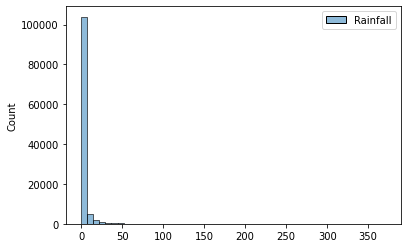

In [692]:
sns.histplot(X_train_num[outliers_retain],bins=50)

Selanjutnya cek feature yang akan di-trim.

In [693]:
#cek feature dengan outlier yang akan di-cap
outliers_summary.loc[outliers_trimming]

,distribution_type,skewnewss,upper_limit,lower_limit,max,min,outliers_percent
WindGustSpeed,Skewed,0.87,73.50,5.50,135.0,6.0,2.14
WindSpeed3pm,Skewed,0.63,40.50,-3.50,87.0,0.0,1.71
Evaporation,Skewed,3.86,14.60,-4.60,145.0,0.0,1.38
WindSpeed9am,Skewed,0.77,37.00,-11.00,130.0,0.0,1.24
Pressure9am,Normal,-0.10,1039.00,996.31,1041.0,980.5,0.36
Humidity9am,Normal,-0.49,125.98,11.83,100.0,1.0,0.32
Pressure3pm,Normal,-0.05,1036.39,994.14,1039.6,978.2,0.30
Temp3pm,Normal,0.24,42.49,0.87,46.7,-5.1,0.28
MaxTemp,Normal,0.22,44.57,1.86,48.1,-4.1,0.23
Temp9am,Normal,0.09,36.45,-2.48,40.2,-7.0,0.10


Sebagian besar feature yang akan di-trim memiliki distribusi normal. Feature yang memiliki skewness cukup besar hanya satu, yaitu `Evaporation`.

Tentukan index dari outlier yang akan di-trim.

In [694]:
#menentukan index untuk trim
trim_index = []
for col in outliers_trimming:
    upper = outliers_summary.loc[col]['upper_limit']
    lower = outliers_summary.loc[col]['lower_limit']
    trim_index.append(X_train_num[((X_train_num[col]>upper) | (X_train_num[col]<lower)) & (X_train_num[col].isnull()==False)].index)

trim_index = [item for sublist in trim_index for item in sublist]
trim_index = list(set(trim_index))
len(trim_index)

6869

Pastikan ukuran train set sebelum di-trim.

In [695]:
X_train_num.shape, X_train_cat.shape, y_train.shape

((116365, 17), (116365, 4), (116365,))

Trim train set berdasarkan index yang telah ditentukan.

In [696]:
X_train_num = X_train_num.drop(index=trim_index)
X_train_cat = X_train_cat.drop(index=trim_index)
y_train = y_train.drop(index=trim_index)

X_train_num.shape, X_train_cat.shape, y_train.shape

((109496, 17), (109496, 4), (109496,))

### 5.4. Handling Missing Values

Selanjutnya akan dilakukan pengolahan missing value.

#### Categorical Features

Untuk feature kategorikal, akan dilakukan imputasi dengan modus.

Cek jumlah missing value pada tiap feature.

In [697]:
X_train_cat.isnull().sum()

WindGustDir    7978
WindDir9am     8305
WindDir3pm     3285
RainToday      2448
dtype: int64

In [698]:
X_test_cat.isnull().sum()

WindGustDir    2022
WindDir9am     2130
WindDir3pm      841
RainToday       645
dtype: int64

Keempat feature memiliki missing value. Lakukan imputasi.

In [699]:
for col in X_train_cat.columns:
    X_train_cat[col] = X_train_cat[col].fillna(X_train_cat[col].mode()[0])
    X_test_cat[col] = X_test_cat[col].fillna(X_train_cat[col].mode()[0])

Cek ulang jumlah missing value pada tiap feature.

In [700]:
X_train_cat.isnull().sum().sum(), X_test_cat.isnull().sum().sum()

(0, 0)

Tidak ada lagi missing value yang ditemukan.

#### Numerical Features

Untuk feature numerikal akan dilakukan imputasi dengan mean untuk feature yang memiliki distribusi normal dan median untuk feature yang memiliki distribusi skewed.

Cek missing value pada tiap feature.

In [701]:
X_train_num.isnull().sum()

MinTemp             1106
MaxTemp              941
Rainfall            2448
Evaporation        47888
Sunshine           52797
WindGustSpeed       7933
WindSpeed9am        1359
WindSpeed3pm        2378
Humidity9am         1954
Humidity3pm         3399
Pressure9am        11345
Pressure3pm        11318
Cloud9am           42319
Cloud3pm           44973
Temp9am             1258
Temp3pm             2713
Day of The Year        0
dtype: int64

In [702]:
X_test_num.isnull().sum()

MinTemp              313
MaxTemp              258
Rainfall             645
Evaporation        12444
Sunshine           13943
WindGustSpeed       2006
WindSpeed9am         356
WindSpeed3pm         596
Humidity9am          550
Humidity3pm          911
Pressure9am         3080
Pressure3pm         3076
Cloud9am           11184
Cloud3pm           11863
Temp9am              391
Temp3pm              732
Day of The Year        0
dtype: int64

Kecuali `Day of the Year`, feature lain memiliki missing value.

Imputasi missing value sesuai tipe distribusinya.

In [703]:
for col in X_train_num.columns:
    col_skewness = X_train_num[column].skew()

    if (col_skewness >= -0.5) & (col_skewness <= 0.5):
        X_train_num[col] = X_train_num[col].fillna(X_train_num[col].mean())
        X_test_num[col] = X_test_num[col].fillna(X_train_num[col].mean()) 

    else:
        X_train_num[col] = X_train_num[col].fillna(X_train_num[col].median())
        X_test_num[col] = X_test_num[col].fillna(X_train_num[col].median()) 

Cek ulang jumlah missing value pada tiap feature.

In [704]:
X_train_num.isnull().sum().sum(), X_test_num.isnull().sum().sum()

(0, 0)

#### Target

Missing value pada target perlu dicek juga. Jika ada missing value, maka akan dilakukan trimming untuk mencegah bias terhadap model karena hanya terdapat dua kelas pada target.

Cek jumlah missing value.

In [705]:
y_train.isnull().sum(), y_test.isnull().sum()

(2462, 617)

Drop missing value dari target dan feature berdasarkan index target yang mengandung missing value.

In [706]:
y_train_misval_index = y_train[y_train.isnull()==True].index.tolist()
y_test_misval_index = y_test[y_test.isnull()==True].index.tolist()

y_train = y_train.drop(index=y_train_misval_index)
X_train_cat = X_train_cat.drop(index=y_train_misval_index)
X_train_num = X_train_num.drop(index=y_train_misval_index)

y_test = y_test.drop(index=y_test_misval_index)
X_test_cat = X_test_cat.drop(index=y_test_misval_index)
X_test_num = X_test_num.drop(index=y_test_misval_index)

Cek ulang jumlah missing value.

In [707]:
y_train.isnull().sum(), y_test.isnull().sum()

(0, 0)

Tidak ada lagi missing value.

### 5.5. Feature Selection

Dari feature yang sudah diolah, cek korelasi antar feature dengan heatmap.

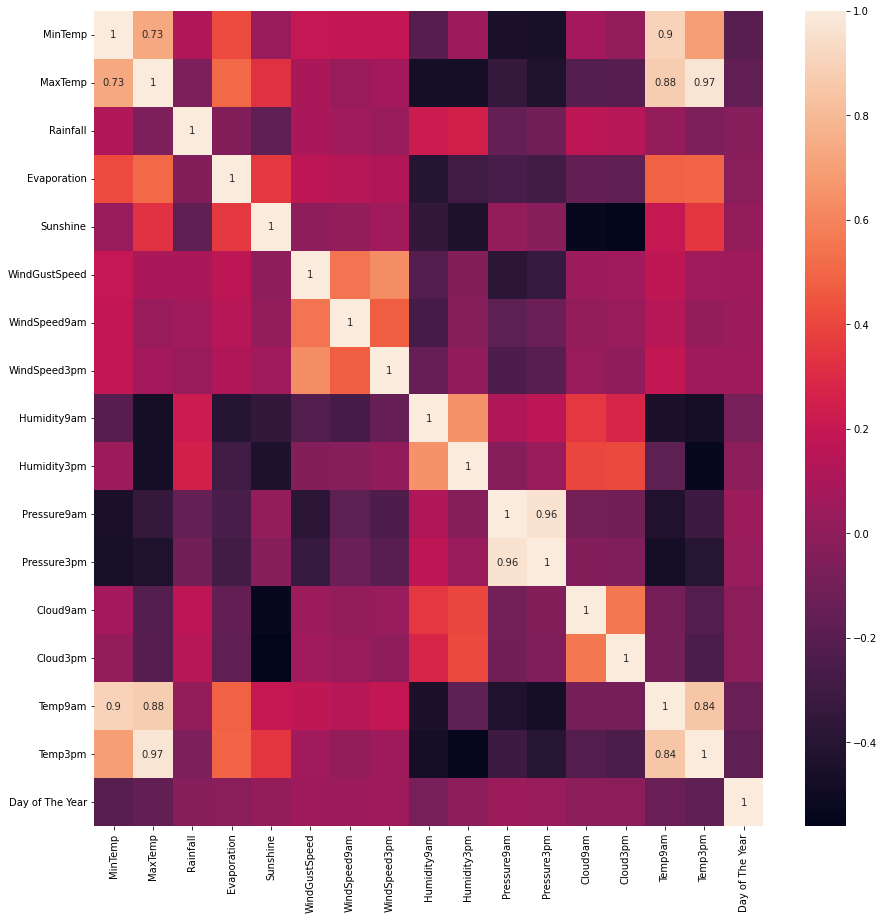

In [708]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(X_train_num.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

plt.show()

Feature dengan korelasi antar feature di atas 0.7 atau dibawah -0.7 akan dihapus dari model karena dianggap bisa diwakili oleh feature lain yang berkorelasi.

Drop feature dari train dan test set.

In [709]:
X_train_num.drop(columns=['Temp9am', 'MinTemp', 'MaxTemp','Pressure9am'],inplace=True)
X_test_num.drop(columns=['Temp9am', 'MinTemp', 'MaxTemp','Pressure9am'],inplace=True)

Cek ulang heatmap.

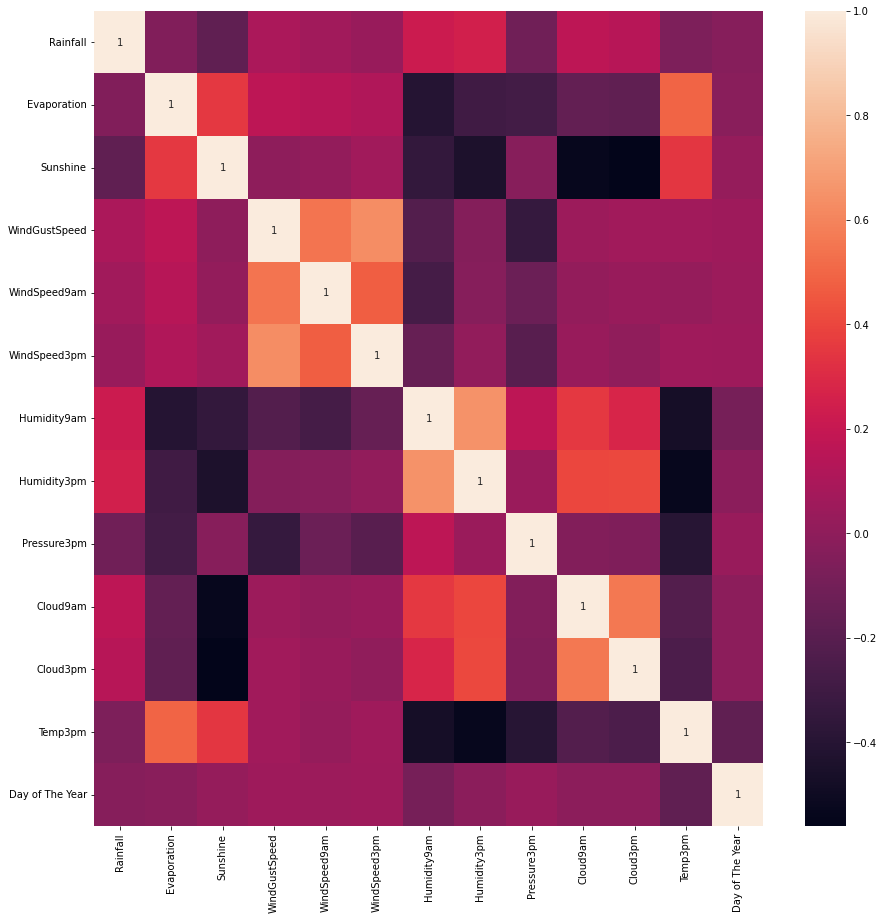

In [710]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(X_train_num.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

plt.show()

Tidak ada lagi feature yang berkorelasi tinggi terhadap feature lain.

Update kolom numerik dan kategorik untuk processing data inference.

In [711]:
num_cols = X_train_num.columns.tolist()
cat_cols = X_train_cat.columns.tolist()

### 5.6. Feature Scaling

Lakukan feature scaling dengan standard scaler untuk feature numerik karena model yang digunakan sensitif terhadap variance.

In [712]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### 5.7. Feature Encoding

Lakukan feature encoding dengan onehot encoder karena dari feature kategorik tidak ada tingkatan yang bermakna atau tidak bisa dibandingkan.

In [713]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

Simpan label baru untuk feature kategorik.

In [714]:
enc_feature = []
for i in range(len(cat_cols)):
    enc_feature+=(encoder.categories_[i].tolist())

### 5.8. Final Features

Gabungkan feature numerik dan kategorik yang telah di-scale dan encode.

In [715]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_enc], axis=1)

X_train_final = pd.DataFrame(X_train_final, columns=[num_cols + enc_feature])
X_test_final = pd.DataFrame(X_test_final, columns=[num_cols + enc_feature])

Lihat lima data teratas.

In [716]:
X_train_final.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,Day of The Year,E,N,NE,NW,S,SE,SW,W,E,N,NE,NW,S,SE,SW,W,E,N,NE,NW,S,SE,SW,W,0.0,1.0
0,0.506172,-1.685835,-0.002375,-1.106773,-1.660465,-0.625819,1.611128,0.710227,0.225499,1.558869,1.667376,-1.227335,0.416639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.280588,-0.001054,-0.002375,-0.662033,-0.536605,-1.515600,1.228664,2.406396,0.489872,0.002674,0.001809,0.039199,-1.351381,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.280588,-0.001054,-0.002375,-0.484137,-0.286859,-0.371596,-0.082640,0.311129,0.567629,0.002674,0.001809,-0.352823,-1.178423,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.280588,-0.186885,-1.252762,-0.484137,0.837001,0.263962,-0.519741,0.710227,0.598732,0.679143,1.190917,0.340755,-0.774853,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.001415,-1.728663,-2.503249,0.049550,0.462381,-0.625819,0.573012,1.608199,-0.318799,1.119006,1.190917,-0.880546,-0.092627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Cek ukuran feature.

In [717]:
X_train_final.shape

(107034, 39)

## 6. Model Definition

Model yang akan digunakan pada notebook ini adalah Logistic Regression sebagai bentuk sederhana dari model klasifikasi dan Support Vector Machine yang dikenal memiliki performa lebih tinggi untuk klasifikasi tetapi dengan computational cost yang tinggi.

Hyperparameter pada Logistic Regression yang di-set adalah solver `lbfgs`, sedangkan nilai penalty yang digunakan adalah *default* `L2` dengan C *default* 1.0.

Sedangkan hyperparameter pada Support Vector Machine yang di-set adalah kernel `poly` dengan derajat *default* 3 dan C *default* 1.0. Hyperparameter tambahan yang digunakan adalah cache size yang di-set 2000 untuk mempercepat training. Pada dasarnya cache size bukan hyperparameter dari model SVC, tetapi parameter untuk mempercepat processing speed algoritma SVC.

In [718]:
#Logistic Regression
logreg = LogisticRegression(solver='lbfgs',random_state=random_state)

#support vector classification
svc = SVC(random_state=random_state,cache_size=2000,kernel='poly')

## 7. Model Training

Lakukan training untuk kedua model.

In [719]:
logreg.fit(X_train_final,y_train)

y_train_pred_lr = logreg.predict(X_train_final)
y_test_pred_lr = logreg.predict(X_test_final)

In [720]:
svc.fit(X_train_final,y_train)

y_train_pred_svc = svc.predict(X_train_final)
y_test_pred_svc = svc.predict(X_test_final)

## 8. Model Evaluation
    > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

### 8.1. Classification Report

#### Logistic Regression

In [721]:
print('Train Logistic Regression\n',classification_report(y_train,y_train_pred_lr))
print(confusion_matrix(y_train,y_train_pred_lr))

Train Logistic Regression
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     83934
         1.0       0.71      0.47      0.57     23100

    accuracy                           0.84    107034
   macro avg       0.79      0.71      0.74    107034
weighted avg       0.83      0.84      0.83    107034

[[79451  4483]
 [12133 10967]]


Dari classification report train logistic regression dapat dilihat bahwa model yang digunakan memiliki performa yang baik untuk klasifikasi `Tidak Hujan Besok`, tetapi ketika memprediksi `Hujan Besok`, model yang digunakan memiliki performa yang buruk. Konteks performa buruk dalam hal ini adalah `sedikit lebih baik dari tebakan acak`.

Performa buruk tersebut disebabkan oleh jumlah `prediksi Hujan Besok, sedangkan kenyataannya Tidak Hujan Besok` hanya berbeda sedikit dengan `prediksi dan kenyataan Hujan Besok`.

Hal ini kemungkinan besar terjadi karena target yang digunakan imbalance pada sisi `Hujan Besok` sehingga model tidak dapat memprediksi `Hujan Besok` dengan tepat.

In [722]:
print('Test Logistic Regression\n',classification_report(y_test,y_test_pred_lr))
print(confusion_matrix(y_test,y_test_pred_lr))

Test Logistic Regression
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     22130
         1.0       0.71      0.50      0.59      6345

    accuracy                           0.84     28475
   macro avg       0.79      0.72      0.75     28475
weighted avg       0.83      0.84      0.83     28475

[[20855  1275]
 [ 3161  3184]]


Sama halnya dengan prediksi train, performa model baik untuk prediksi `Tidak Hujan Besok`, tetapi buruk untuk prediksi `Hujan Besok`.

Secara model, bisa dikatakan bahwa model ini `good fit` karena `f1-score`-nya tidak berbeda jauh antara train dan test.

#### Support Vector Machine

In [723]:
print('Train Support Vector Machine\n',classification_report(y_train,y_train_pred_svc))
print(confusion_matrix(y_train,y_train_pred_svc))

Train Support Vector Machine
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     83934
         1.0       0.81      0.45      0.58     23100

    accuracy                           0.86    107034
   macro avg       0.84      0.71      0.75    107034
weighted avg       0.85      0.86      0.84    107034

[[81529  2405]
 [12732 10368]]


Untuk train set, SVC memiliki performa yang sedikit lebih baik dibandingkan model logistic regression, tetapi masih mengalami masalah yang sama terkait data imbalance sehingga prediksi `Hujan Besok`-nya masih banyak yang tidak tepat.

In [724]:
print('Test Logistic Regression\n',classification_report(y_test,y_test_pred_lr))
print(confusion_matrix(y_test,y_test_pred_lr))

Test Logistic Regression
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     22130
         1.0       0.71      0.50      0.59      6345

    accuracy                           0.84     28475
   macro avg       0.79      0.72      0.75     28475
weighted avg       0.83      0.84      0.83     28475

[[20855  1275]
 [ 3161  3184]]


Untuk test set juga masih mengalami masalah yang sama. 

Model ini memiliki kecenderungan sedikit overfit, meskipun selisihnya tidak begitu jauh.

### 8.2. ROC Curve & AUC Score

Visualisasikan hasil prediksi test set dengan ROC Curve dilengkapi dengan AUC Score.

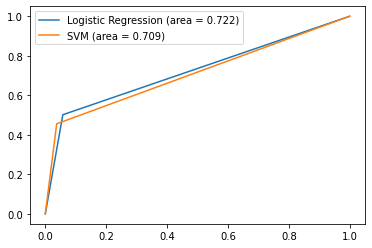

In [725]:
#buat estimasi fpr dan tpr dari nilai prediksi, lalu plot
plt.figure(0).clf()
lr_fpr, lr_tpr, _ = roc_curve(y_test,y_test_pred_lr)
lr_auc = roc_auc_score(y_test,y_test_pred_lr)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.3f)' % lr_auc)

svc_fpr, svc_tpr, _ = roc_curve(y_test,y_test_pred_svc)
svc_auc = roc_auc_score(y_test,y_test_pred_svc)
plt.plot(svc_fpr, svc_tpr, label='SVM (area = %0.3f)' % svc_auc)

plt.legend()
plt.show()

Dari ROC curve dan AUC score kita lihat bahwa model Logistic Regression memiliki performa yang lebih baik dibandingkan model Support Vector Machine, meskipun dengan catatan bahwa untuk prediksi `Hujan Besok` belum sebaik prediksi `Tidak Hujan Besok`.

## 9. Model Inference

Sebelum melakukan inference, cek data inference terlebih dahulu.

In [726]:
df_inf

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day of The Year
42120,11.5,23.3,0.0,5.0,4.7,SE,37.0,W,S,11.0,30.0,74.0,60.0,1031.1,1028.8,5.0,2.0,17.6,21.9,0.0,0.0,116
13909,13.9,27.4,0.0,4.4,10.8,SW,31.0,E,SW,17.0,20.0,50.0,27.0,1017.6,1014.4,1.0,3.0,21.1,26.0,0.0,0.0,106
76533,10.8,16.5,5.8,0.6,0.2,W,54.0,NW,NW,26.0,28.0,94.0,84.0,1021.3,1019.9,8.0,8.0,13.5,15.8,1.0,1.0,182


Split data menjadi numerik dan kategorik.

In [727]:
#split num and cat
df_inf_num = df_inf[num_cols]
df_inf_cat = df_inf[cat_cols]

Lakukan scaling dan encoding.

In [728]:
df_inf_num_scaled = scaler.transform(df_inf_num)
df_inf_cat_enc = encoder.transform(df_inf_cat).toarray()

Gabungkan data yang sudah diproses.

In [729]:
#concat
df_inf_final = np.concatenate([df_inf_num_scaled,df_inf_cat_enc],axis=1)
df_inf_final = pd.DataFrame(df_inf_final, columns=[num_cols + enc_feature])
df_inf_final

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,Day of The Year,E,N,NE,NW,S,SE,SW,W,E,N,NE,NW,S,SE,SW,W,E,N,NE,NW,S,SE,SW,W,0.0,1.0
0,-0.280588,-0.015576,-1.068867,-0.128345,-0.286859,1.535077,0.245186,0.410903,2.045009,0.239280,-1.191383,0.039199,-0.601894,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.280588,-0.272539,1.174653,-0.662033,0.462381,0.263962,-1.066118,-1.235378,-0.194388,-1.520173,-0.714923,0.657389,-0.697982,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.455413,-1.899971,-2.723923,1.383770,1.586241,1.280854,1.337940,1.608199,0.660937,1.558869,1.667376,-0.880546,0.032287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Prediksi nilai target.

In [730]:
y_inf_pred_lr = logreg.predict(df_inf_final)
y_inf_pred_svc = svc.predict(df_inf_final)

df_inf['y-pred-lr'] = y_inf_pred_lr
df_inf['y-pred-svc'] = y_inf_pred_svc
df_inf[['y-pred-lr','y-pred-svc']]

,y-pred-lr,y-pred-svc
42120,0.0,0.0
13909,0.0,0.0
76533,1.0,1.0


Kedua model memiliki prediksi yang sama.

## 10. Pengambilan Kesimpulan

Berdasarkan analisis yang telah dilakukan, berikut kesimpulan yang didapat:
1. Tidak ditemukan feature dengan korelasi yang kuat terhadap `RainTomorrow` atau `Hujan Besok`
2. Beberapa feature memiliki korelasi antar feature yang kuat seperti `Temp` dan `Pressure`
3. Model Logistic Regression dengan solver lbfgs memiliki performa yang lebih baik dibandingkan model Support Vector Machine polynomial derajat 3
4. Performa model dapat ditingkatkan lagi dengan menyamakan distribusi jumlah target, pada kasus ini menyamakan jumlah data `Yes` pada `RainTomorrow` dengan up/over sampling.